# Content:
1. [Integer overflow](#integer-overflow)
2. [Finding the cube root](#cube-root)
3. [The river crossing problem](#river-crossing)

# 1. <a name="integer-overflow">Integer overflow</a>

## Bits and Bytes

* Bit (binary digit) is the fundamental unit of memory. A bit can be physically realized using a two-state device. Possible values a bit can store are the two states of the device, represented typically by 0 or 1.
* A byte, B, (= 8 Bits) is a derived unit of memory. Much larger units
that are multiples of bytes are commonly encountered in computational sciences.
* RAM (Random Access Memory) is a computer’s primary storage device. The data stored in RAM will be deleted when the CPU is switched off. Hence RAM is said to have volatile memory. RAM consists of virtual address space (VAS), where each address is a numerical number (in binary, decimal, or hexadecimal representation). A 64-bit system uses 64-bit addresses. A 64-bit (8 B) laptop with 16 GB RAM can have 16x1024^3/8 = 2.14 × 10^9 addresses. Each address can hold only 1 Byte of data.
* To simplify programming using numerical address (binary or hex- adecimal), programming languages have the concept of variables. A variable is a named location that can store a value of a particular type (integer, real, character, logical, etc). 
* For example, a Fortran statement like `integer :: A`, declares an integer data (of size 4 bytes) for which 4 addresses in the VAS will be reserved. The equivalent in Python is `numpy.int64(A)`

## Integer bounds

* An $N$-bit integer variable can be used to store any of the 2$N$ integers in the range −(2$N$−1) to (2$N$−1) − 1. A hypothetical 1-bit integer can only store the two integers −1, and 0.

Let's see what is the range of integers, the default `int` datatype in Python can store.

In [1]:
import numpy as np

np.iinfo(int) # Bounds of the default integer on this system.

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [2]:
N=64; print(-2**(N-1), 2**(N-1)-1) 

-9223372036854775808 9223372036854775807


## Ariane 5 and the overflow-bug

What this youtube video: https://www.youtube.com/watch?v=gp_D8r-2hwk

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('gp_D8r-2hwk', width=800, height=300)

Here is what the official investigation report (https://www.ima.umn.edu/∼arnold/disasters/ariane.html) says

```On June 4, 1996 an unmanned Ariane 5 rocket launched by the European Space Agency exploded just forty seconds after its lift-off from Kourou, French Guiana. Ariane explosion The rocket was on its first voyage, after a decade of development costing $7 billion. The destroyed rocket and its cargo were valued at $500 million. A board of inquiry investigated the causes of the explosion and in two weeks issued a report.
It turned out that the cause of the failure was a software error in the inertial reference system. Specifically a
64 bit floating point number relating to the horizontal velocity of the rocket with respect to the platform was converted to a 16 bit signed integer. The number was larger than 32,767, the largest integer storeable in a 16 bit signed integer, and thus the conversion failed.```

The ’software-bug’ that was responsible for the failure of Ariane 5 is an overflow error, which arises when a variable declared as a low memory datatype (i.e. fewer addresses in the VAS) is assigned a numerical value requiring large memory (requiring more addresses in the VAS). Modern compilers (Fortran or C++) can detect such scenarios and either warn the user during compilation or simply fail to compile with a relevant error message. 

The following code demonstrates the overflow error discussed above by assigning an 4-byte (64 bit) integer to a 1-byte (8 bit) integer variable.

In [4]:
A=np.int8(323); print(A)

67


The resulting program when executed returns the answer 67, which is the remainder in the integer divi- sion 323/256. Integer overflow happens when an $N$-bit variable is assigned a value that is either less than −$(2N−1)$ or greater than $(2N−1)$−1. Specifically, integer overflow causes the number to be reduced modulo a power of two — in our case after reaching 127, the couting starts at −128, goes through −127,−126, and so on, eventually ending at 67 as the three-hundred-and-twenty-third integer. 
The following xkcd cartoon (https://xkcd.com/571/) illustrates integer overflow in a humorous way.

 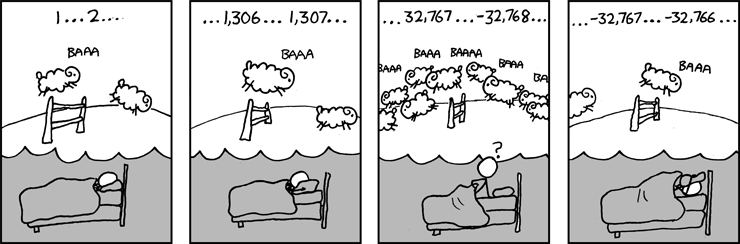

# 2. <a name="cube-root">Finding the cube root</a>

Let's see how to use fixed-point iteration to find the cube root of a number. As we have discussed, in this procedure in order to solve the problem $f(x)=0$, we have to express the problem as $x=g(x)$. Then, our working formula is $x_{k+1}=g(x_k)$. We will start with the initial guess for the solution, $x_0$, and then by iterating converge to a refined answer.

The problem at hand is $x^3=N \Rightarrow x^3-N=0$, and we want to find the root of this equation. So, let's first write it in the format $x=g(x)$. By a little bit of manipulation, we can get $x^2=N/x \Rightarrow x=\sqrt{N/x}$. 

In [5]:
def f(N,x):
    val=x**3-N
    return val

def g(N,x):
    val=np.sqrt(N/x)
    return val

In [6]:
print(range(5))

range(0, 5)


In [7]:
N=10   # because we want to find the cube root of 10
Max_iter=50
x=2  # initial value of x

for iter in range(0,Max_iter):
    x=g(N,x)  # x is assigned a new value, xnew = g(xold)
    fn=f(N,x)
    print(iter,x,fn)

0 2.23606797749979 1.1803398874989508
1 2.114742526881128 -0.5425839099682435
2 2.174559276040982 0.28285594297889816
3 2.144442346687759 -0.13849670452788665
4 2.1594483084632885 0.06997605600685652
5 2.151932247574706 -0.0348054679481109
6 2.155687002315689 0.017448294411751775
7 2.153808806733035 -0.008712747168935664
8 2.154747699882162 0.004359222351546066
9 2.1542782021581965 -0.002178898828811171
10 2.1545129382314356 0.0010896274817433493
11 2.154395566997804 -0.0005447692216158373
12 2.1544542518153453 0.00027239574031945324
13 2.1544249092067584 -0.00013619508774631583
14 2.154439580461098 6.809823947406812e-05
15 2.1544322448214395 -3.4048945837028555e-05
16 2.1544359126381463 1.702451639040703e-05
17 2.154434078729013 -8.51224732301148e-06
18 2.1544349956833844 4.256126381108061e-06
19 2.1544345372061495 -2.1280625137620746e-06
20 2.154434766444755 1.0640314265231154e-06
21 2.154434651825449 -5.320156741817073e-07
22 2.1544347091351015 2.660078486371731e-07
23 2.15443468048

In [8]:
print(N**(1/3))

2.154434690031884


We can see that in 50 iterations, we have arrived at the desired value of the cube root of 10. Again, it is possible to improve the code in so many different ways. To begin with, we can again use the `while` loop. 

In [9]:
N=10
x=2
xthresh=1e-8 # threshold accuracy to which we want to converge our root


#dx=x
dx=999999  # choose initial dx as a fairly large number

iter=0
while dx>xthresh:
    iter+=1   # iter = iter + 1
    gn=g(N,x)
    dx=abs(x-gn)
    x=gn
    fn=f(N,x)
    print(iter,x,fn)

1 2.23606797749979 1.1803398874989508
2 2.114742526881128 -0.5425839099682435
3 2.174559276040982 0.28285594297889816
4 2.144442346687759 -0.13849670452788665
5 2.1594483084632885 0.06997605600685652
6 2.151932247574706 -0.0348054679481109
7 2.155687002315689 0.017448294411751775
8 2.153808806733035 -0.008712747168935664
9 2.154747699882162 0.004359222351546066
10 2.1542782021581965 -0.002178898828811171
11 2.1545129382314356 0.0010896274817433493
12 2.154395566997804 -0.0005447692216158373
13 2.1544542518153453 0.00027239574031945324
14 2.1544249092067584 -0.00013619508774631583
15 2.154439580461098 6.809823947406812e-05
16 2.1544322448214395 -3.4048945837028555e-05
17 2.1544359126381463 1.702451639040703e-05
18 2.154434078729013 -8.51224732301148e-06
19 2.1544349956833844 4.256126381108061e-06
20 2.1544345372061495 -2.1280625137620746e-06
21 2.154434766444755 1.0640314265231154e-06
22 2.154434651825449 -5.320156741817073e-07
23 2.1544347091351015 2.660078486371731e-07
24 2.1544346804

We can change the code a little bit to print our ouput in a pretty format 

In [10]:
N=10
x=2
xthresh=1e-8 # threshold accuracy to which we want to converge our root

dx=x

iter=0

print('======================================')
print('Iterations    x               f(x)')
print('======================================')
while dx>xthresh: 
    iter+=1
    gn=g(N,x)
    dx=abs(x-gn)
    x=gn
    fn=f(N,x)
    print('{:5d}  {:15.8f} {:15.8f}'.format(iter,x,fn))

Iterations    x               f(x)
    1       2.23606798      1.18033989
    2       2.11474253     -0.54258391
    3       2.17455928      0.28285594
    4       2.14444235     -0.13849670
    5       2.15944831      0.06997606
    6       2.15193225     -0.03480547
    7       2.15568700      0.01744829
    8       2.15380881     -0.00871275
    9       2.15474770      0.00435922
   10       2.15427820     -0.00217890
   11       2.15451294      0.00108963
   12       2.15439557     -0.00054477
   13       2.15445425      0.00027240
   14       2.15442491     -0.00013620
   15       2.15443958      0.00006810
   16       2.15443224     -0.00003405
   17       2.15443591      0.00001702
   18       2.15443408     -0.00000851
   19       2.15443500      0.00000426
   20       2.15443454     -0.00000213
   21       2.15443477      0.00000106
   22       2.15443465     -0.00000053
   23       2.15443471      0.00000027
   24       2.15443468     -0.00000013
   25       2.15443469      0

# 3. <a name="river-crossing">The river crossing problem</a>

This classic problem needs no description. But, for those who have forgotten here it is 

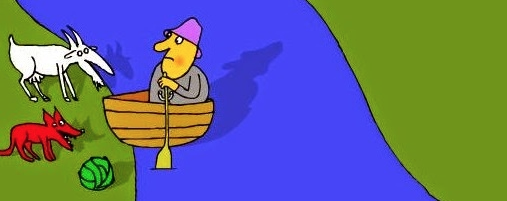   
Source: https://mark-borg.github.io/blog/2016/river-crossing-puzzles/

```
Once upon a time, there was a Farmer who had a tiny boat. The boat was so tiny that it could only take the Farmer himself and one additional passenger. He wanted to move a Wolf, a Goat and a Cabbage across a river with his tiny boat. 

When the Farmer is around, everyone is safe, the Wolf will not eat the Goat, the Goat will not eat the Cabbage.

But he can’t leave the Wolf alone with the Goat because the Wolf will eat the Goat. He can’t leave the Goat alone with the Cabbage because the Goat will eat the Cabbage.

And of course he can only fit one more object with him on the boat (either the Wolf, the Goat or the Cabbage).

The question is: How can he safely transport the three of them to the other side of the river?
```

Can we find the answer by programming? Let's make an attempt. 

What we are trying to find is a sequence of `state`, where a state tells us the positions (Left or Right to the river), of all four characters. 

So, we know what a brute-force solution can be. We will have to make a `function` that tells us if a `state` is allowed or not. Then, for an initial `state`, we find out what can be the next allowed `state`. 

In the beginning, all are on the left bank of the river, so we have `state=['L','L','L','L']`. 

_Where, we assume that the order of the characters are Farmer, Cabbage, Goat, and Wolf._

Our program must give us the sequence as follows.

`['L','L','L','L']`   
`...`   
`...`   
`['R','R','R','R']`

Let's write a `function` that tells us whether a state is allowed or not. Instead of writing the complete function, let's start with something, figure out how Python works, and how to `call` the function and so on.

In [11]:
def allowed_or_not(A):
    #
    # We are going to assume that the order of the characters are Farmer, Cabbage, Goat, and Wolf.
    #
    
    val=True # We are assigning a logical data type which can take only two values (True or False)
    
    # Suppose the cabbage and goat are on the same side, but the farmer is on the other side
    if A[1] == A[2] and A[1] != A[0]:
        val=False
    return val

In [12]:
State=['L','L','L','L']
status=allowed_or_not(State)
print(status)

True


In [13]:
if status:  # if status == True:
    print('The state is allowed')

The state is allowed


In [14]:
State=['L','R','R','L']
status=allowed_or_not(State)
print(status)

False


Let's add more conditions to the function.

In [15]:
def allowed_or_not(A):
    
    # We are going to assume that the order of the characters are Farmer, Cabbage, Goat, and Wolf.
    # The output of the function is a logical data type which can take only two values (True or False).
    
    # Suppose the cabbage and the goat are on the same side, but the farmer is on the other side
    if A[1] == A[2] and A[1] != A[0]:
        val=False
    # Suppose the goat and the wolf are on the same side, but the farmer is on the other side
    elif A[2] == A[3] and A[2] != A[0]:
        val=False
    else:
        val=True # All other states are allowed
    
    #if (val):
        #print(A, ' is an allowed state')
        
    return val

Now let's use the function `allowed_or_not` and try to solve the problem, step-by-step.

In [16]:
# Initial state
State0=['L','L','L','L']

# Now let's try all possible moves from the initial state
# We know that the maximum number of changes we can make is two (that is the maximum number the boat can carry)
# So, we will ensure that we never change more than two elements of `State`

In [17]:
i=0 # 0 is Farmer
j=1 # 1 is Cabbage

State=State0.copy() # Note this line. We are doing a deep copy. Read about deep copy.
State[i]='R' # Farmer crosses 
status=allowed_or_not(State)
print(status)

False


In [18]:
State=State0.copy()
State[j]='R' # Cabbage crosses 
status=allowed_or_not(State)
print(status)

True


In [19]:
State=State0.copy()
State[i]='R' # Farmer crosses 
State[j]='R' # Cabbage crosses
status=allowed_or_not(State)
print(status)

False


At this point, we have learned a lesson! 

We have to write another function that tells us that the cabbage, the goat or the wolf cannot cross the river alone. 

This means that if only one position changes from 'L' or 'R', then it must correspond to that of the farmer.

In [20]:
i=0 # 0 is Farmer
j=1 # 1 is Cabbage
State=State0.copy()
State[j]='R' # Cabbage crosses 

print(State0, State)

N_diff_State=0
for i in range(len(State0)):
    if State0[i] != State[i]:
        N_diff_State=N_diff_State+1

print(N_diff_State)

['L', 'L', 'L', 'L'] ['L', 'R', 'L', 'L']
1


which means, one element in the current `State` is new compared to the previous one.

In [21]:
def allowed_move(State_i, State_f):

    N_diff_State=0
    for i in range(len(State_i)):
        if State_i[i] != State_f[i]:
            N_diff_State=N_diff_State+1

    if State_i[0] == State_f[0] and N_diff_State >= 1: # Farmer is not changing, but 1 or more characters are crossing
        val=False
    else:
        val=True
        
    return val

In [22]:
i=0 # 0 is Farmer
j=1 # 1 is Cabbage
State_i=State0.copy()
State_f=State0.copy()
State_f[j]='R' # Cabbage crosses 
    
status_move=allowed_move(State_i, State_f)
print(status_move)

False


The `False` above means that cabbage crossing the river alone is not an allowed move!

Now, for every move, only when `status_move` is True, we will check `status` (which is the status of everybody's position). 

In [23]:
print(State0)

['L', 'L', 'L', 'L']


In [24]:
i=0 # 0 is Farmer
j=1 # 1 is Cabbage

In [25]:
State_i=State0.copy() 
State_f=State_i.copy()

State_f[i]='R' # Farmer crosses 

print(State_i, State_f)

status_move=allowed_move(State_i, State_f)

if (status_move):
    status=allowed_or_not(State_f)
    print(status)

['L', 'L', 'L', 'L'] ['R', 'L', 'L', 'L']
False


See, here the move is allowed because the farmer can cross the river alone, but the final status where the other three characters are together is not allowed.

In [26]:
State_i=State0.copy() 
State_f=State_i.copy()

State_f[i]='R' # Farmer crosses 
State_f[j]='R' # Cabbage crosses 

print(State_i, State_f)

status_move=allowed_move(State_i, State_f)

if (status_move):
    status=allowed_or_not(State_f)
    print(status)

['L', 'L', 'L', 'L'] ['R', 'R', 'L', 'L']
False


In [27]:
# We will never need this scenario that the cabbage crosses alone
State_i=State0.copy() 
State_f=State_i.copy()

State_f[j]='R' # Cabbage crosses 

print(State_i, State_f)

status_move=allowed_move(State_i, State_f)

if (status_move):
    status=allowed_or_not(State_f)
    print(status)

['L', 'L', 'L', 'L'] ['L', 'R', 'L', 'L']


Here the status is not printed because, the move (cabbage crossing alone) is not allowed.

In [28]:
i=0 # 0 is Farmer
j=2 # 2 is Goat

In [29]:
State_i=State0.copy() 
State_f=State_i.copy()

State_f[i]='R' # Farmer crosses 

print(State_i, State_f)

status_move=allowed_move(State_i, State_f)

if (status_move):
    status=allowed_or_not(State_f)
    print(status)

['L', 'L', 'L', 'L'] ['R', 'L', 'L', 'L']
False


In [30]:
State_i=State0.copy() 
State_f=State_i.copy()

State_f[i]='R' # Farmer crosses 
State_f[j]='R' # Goat crosses 

print(State_i, State_f)

status_move=allowed_move(State_i, State_f)

if (status_move):
    status=allowed_or_not(State_f)
    print(status)

['L', 'L', 'L', 'L'] ['R', 'L', 'R', 'L']
True


`True' above means that we have made our first move successfully. Farmer and goat have crossed the river.

Let us now loop over all pairwise combinations. Here is an example of a `for` loop.

In [31]:
for i in range(4):
    for j in range(i+1,4):
        print(i,j)

0 1
0 2
0 3
1 2
1 3
2 3


We will need another function which swaps the value from 'L' to 'R' and vice versa. We need this function to allow the possibility that the farmer can return from 'R' to 'L'.

In [32]:
def state_swap(State,ival):
    oldval=State[ival]
    if oldval=='L':
        State[ival]='R'
    elif oldval=='R':
        State[ival]='L'
    else:
        print('Unknown status encountered in function state_swap')
    return State

Let's see how the above function works.

In [33]:
State_i=State0.copy()
State_i=state_swap(State_i,0)
print(State_i)
State_i=state_swap(State_i,0)
print(State_i)
State_i=state_swap(State_i,0)
print(State_i)

['R', 'L', 'L', 'L']
['L', 'L', 'L', 'L']
['R', 'L', 'L', 'L']


In [34]:
State_i=State0.copy() # Initial state

i = 0 # i is always the farmer

for j in range(1,4):
        
        # Farmer crossing alone
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(i,j,status,State_i, State_f)
                State_i=State_f        
        
        # Farmer crossing with another character
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        State_f=state_swap(State_f,j)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(i,j,status,State_i, State_f)
                State_i=State_f    

0 2 True ['L', 'L', 'L', 'L'] ['R', 'L', 'R', 'L']
0 3 True ['R', 'L', 'R', 'L'] ['L', 'L', 'R', 'L']
0 3 True ['L', 'L', 'R', 'L'] ['R', 'L', 'R', 'R']


Step1: Farmer and Goat cross    
Step2: Farmer returns     
Step3: Farmer and tiger cross  

So far, we have found the sequence in agreement with our intuition.

_Now we are in an interesting situation! We have run over all indices but we want the farmer to go back. 
What to do next?_

Well, we will repeat the entire process again. 

That means, we have to do one more iteration!

In [35]:
for j in range(1,4):
            
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(i,j,status,State_i, State_f)
                State_i=State_f
                    
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        State_f=state_swap(State_f,j)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(i,j,status,State_i, State_f)
                State_i=State_f

0 2 True ['R', 'L', 'R', 'R'] ['L', 'L', 'L', 'R']


Step4: Farmer returns

In [36]:
for j in range(1,4):
            
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(i,j,status,State_i, State_f)
                State_i=State_f
                    
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        State_f=state_swap(State_f,j)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(i,j,status,State_i, State_f)
                State_i=State_f

0 1 True ['L', 'L', 'L', 'R'] ['R', 'R', 'L', 'R']
0 2 True ['R', 'R', 'L', 'R'] ['L', 'R', 'L', 'R']
0 2 True ['L', 'R', 'L', 'R'] ['R', 'R', 'R', 'R']


Step5: Farmer and cabbage cross   
Step6: Farmer returns    
Step7: Farmer and goat cross   

And then they shoud have lived happily ever after, but we have forgotten to stop the iteration once all parties move to the right side of the river. 

So, if we do one more iteration the farmer and the goat will return to the left side and the cycle will have to repeat

In [37]:
for j in range(1,4):
            
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(i,j,status,State_i, State_f)
                State_i=State_f
                    
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        State_f=state_swap(State_f,j)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(i,j,status,State_i, State_f)
                State_i=State_f

0 2 True ['R', 'R', 'R', 'R'] ['L', 'R', 'L', 'R']
0 3 True ['L', 'R', 'L', 'R'] ['R', 'R', 'L', 'R']
0 3 True ['R', 'R', 'L', 'R'] ['L', 'R', 'L', 'L']


In the following, we have a stand-alone code, where we will include a condition to stop the iteration when all four members are on the right side.

## A stand-alone code

In [38]:
def allowed_or_not(A):
    
    # We are going to assume that the order of the characters are Farmer, Cabbage, Goat, and Wolf.
    # The output of the function is a logical data type which can take only two values (True or False).
    
    # Suppose the cabbage and the goat are on the same side, but the farmer is on the other side
    if A[1] == A[2] and A[1] != A[0]:
        val=False
    # Suppose the goat and the wolf are on the same side, but the farmer is on the other side
    elif A[2] == A[3] and A[2] != A[0]:
        val=False
    else:
        val=True # All other states are allowed
    
    #if (val):
        #print(A, ' is an allowed state')
        
    return val

def allowed_move(State_i, State_f):

    N_diff_State=0
    for i in range(len(State_i)):
        if State_i[i] != State_f[i]:
            N_diff_State=N_diff_State+1

    if State_i[0] == State_f[0] and N_diff_State == 1: # Farmer is not changing, but 1 character is crossing
        val=False
    else:
        val=True
        
    return val

def state_swap(State,ival):
    oldval=State[ival]
    if oldval=='L':
        State[ival]='R'
    elif oldval=='R':
        State[ival]='L'
    else:
        print('Unknown status encountered in function state_swap')
    return State

In [39]:
# Main program

# Maximum number of iterations
Max_iter=10 

# Initial state
State0=['L','L','L','L']

# Desired target state
State_target=['R','R','R','R']

# Initialize the temporary initial state list
State_i=State0.copy()

while State_i != State_target:

    i = 0
    for j in range(1,4):
            
            State_f=State_i.copy() 
            State_f=state_swap(State_f,i)
            status_move=allowed_move(State_i, State_f)

            if (status_move):
                status=allowed_or_not(State_f)
                if (status):
                    print(State_i, '->', State_f)
                    State_i=State_f
                    
            State_f=State_i.copy() 
            State_f=state_swap(State_f,i)
            State_f=state_swap(State_f,j)
            status_move=allowed_move(State_i, State_f)

            if (status_move):
                status=allowed_or_not(State_f)
                if (status):
                    print(State_i, '->', State_f)
                    State_i=State_f

['L', 'L', 'L', 'L'] -> ['R', 'L', 'R', 'L']
['R', 'L', 'R', 'L'] -> ['L', 'L', 'R', 'L']
['L', 'L', 'R', 'L'] -> ['R', 'L', 'R', 'R']
['R', 'L', 'R', 'R'] -> ['L', 'L', 'L', 'R']
['L', 'L', 'L', 'R'] -> ['R', 'R', 'L', 'R']
['R', 'R', 'L', 'R'] -> ['L', 'R', 'L', 'R']
['L', 'R', 'L', 'R'] -> ['R', 'R', 'R', 'R']


We have accomplished our task, but we can improve the program in so many ways! For example, we can print the sequence differently.

In [40]:
# Main program

# Maximum number of iterations
Max_iter=10 

# Initial state
State0=['L','L','L','L']

# Desired target state
State_target=['R','R','R','R']

# Initialize the temporary initial state list
State_i=State0.copy()

print(State_i)

while State_i != State_target:

    i = 0
    for j in range(1,4):
            
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(State_f)
                State_i=State_f
                    
        State_f=State_i.copy() 
        State_f=state_swap(State_f,i)
        State_f=state_swap(State_f,j)
        status_move=allowed_move(State_i, State_f)

        if (status_move):
            status=allowed_or_not(State_f)
            if (status):
                print(State_f)
                State_i=State_f

['L', 'L', 'L', 'L']
['R', 'L', 'R', 'L']
['L', 'L', 'R', 'L']
['R', 'L', 'R', 'R']
['L', 'L', 'L', 'R']
['R', 'R', 'L', 'R']
['L', 'R', 'L', 'R']
['R', 'R', 'R', 'R']


## Alternative sequence?

What about the following sequence? Why is our program not giving this sequence? How should we modify the program so that we can get the following sequence.

```
['L', 'L', 'L', 'L']
['R', 'L', 'R', 'L']
['L', 'L', 'R', 'L']
['R', 'R', 'R', 'L']  # This time, the farmer takes the cabbage along 
['L', 'R', 'L', 'L']
['L', 'R', 'L', 'R']  # and then the wolf 
['R', 'R', 'R', 'R'] 
```